For next your task, you will be working on performing Segmentation on EV Market based on the datasets shared. 

Each member here has to perform their own Segmentation by selecting datasets. Each member select 1 dataset.

After selecting the dataset, kindly mention in this group, which dataset you have selected to work

After performing the segmentation, kindly prepare a report based on the following questions (omit the questions from the report):

1. Explain how and which ML model (algorithm) helped you in 2nd Project?
2. Elaborate on the final conclusion & insights gained from the research/analysis work.
3. How will you improve upon the Market Segmentation Project given additional time & some budget to purchase data? (in terms of Datasets collection - name what columns points you will search for & what additional ML models you would like to try)
4. What is the estimated  Market Size for your Market Domain (non-segmented) in Numbers?
5. Name top 4 Variables/features which can be used to create most optimal Market Segments for your Market Domain

Sample Segmentation Report on EV Market

https://github.com/Rohit-Rannavre/Feynn-Labs-Internship-2022 

Submit the Report by 17th  Oct (performed individually) in Discord #report-submission-r2

If you have any query, don't hesitate to ask

Sample Segmentation Report on EV Market

https://github.com/Rohit-Rannavre/Feynn-Labs-Internship-2022 

Each member here has to perform their own Segmentation by selecting datasets. Each member select 1 dataset.

After selecting the dataset, kindly mention in this group, which dataset you have selected to work on

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### European EV Market Dataset

In [3]:
df_euro_ev = pd.read_csv('./Electric Vechile Dataset Smaller/ElectricCarData_Clean.csv')

### European EV Sales

In [4]:
df_ev_sales = pd.read_excel('./Open Data Government of India/Ev Sales.xlsx')

### EV India Electric Market Dataset

In [5]:
df_india_ev = pd.read_csv('./Kaggle/EVIndia.csv')

#### Adoption of Electric Vechiles by State in India (Open Data)

In [6]:
df_open_data_india = pd.read_excel('./Open Data Government of India/EV_Sales_Data_set.xlsx')

##### Analysing the Datasets

In [7]:
#shape of different dataset
print("European Ev Market Dataset {}".format(df_euro_ev.shape))
print("EV European Sales Dataset {}".format(df_ev_sales.shape))
print("EV India Market Dataset {}".format(df_india_ev.shape))
print("Open Govenment Dataset EV {}".format(df_open_data_india.shape))

European Ev Market Dataset (103, 14)
EV European Sales Dataset (74, 6)
EV India Market Dataset (12, 10)
Open Govenment Dataset EV (35, 4)


### Preprocessing Datasets
##### 1. European Ev Market Dataset

In [8]:
df_euro_ev.head(2).T

,0,1
Brand,Tesla,Volkswagen
Model,Model 3 Long Range Dual Motor,ID.3 Pure
AccelSec,4.6,10.0
TopSpeed_KmH,233,160
Range_Km,450,270
Efficiency_WhKm,161,167
FastCharge_KmH,940,250
RapidCharge,Yes,Yes
PowerTrain,AWD,RWD
PlugType,Type 2 CCS,Type 2 CCS


In [9]:
df_euro_ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [10]:
# We can see this data is as object but it consists of multiple numerical values to lets change it into Integer
# step 1 replate '-' values with '0'
# Step 2 convert the data into INT values
df_euro_ev['FastCharge_KmH'].unique()

array(['940', '250', '620', '560', '190', '220', '420', '650', '540',
       '440', '230', '380', '210', '590', '780', '170', '260', '930',
       '850', '910', '490', '470', '270', '450', '350', '710', '240',
       '390', '570', '610', '340', '730', '920', '-', '550', '900', '520',
       '430', '890', '410', '770', '460', '360', '810', '480', '290',
       '330', '740', '510', '320', '500'], dtype=object)

In [11]:
df_euro_ev['FastCharge_KmH'] = df_euro_ev['FastCharge_KmH'].replace('-','0')

In [12]:
df_euro_ev['RapidCharge'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df_euro_ev['RapidCharge'] = df_euro_ev['RapidCharge'].replace({'Yes':'1','No':'0'})

In [14]:
df_euro_ev['PowerTrain'].unique()

array(['AWD', 'RWD', 'FWD'], dtype=object)

In [15]:
df_euro_ev['PlugType'].unique()

array(['Type 2 CCS', 'Type 2 CHAdeMO', 'Type 2', 'Type 1 CHAdeMO'],
      dtype=object)

In [16]:
df_euro_ev['BodyStyle'].unique()

array(['Sedan', 'Hatchback', 'Liftback', 'SUV', 'Pickup', 'MPV', 'Cabrio',
       'SPV', 'Station'], dtype=object)

In [17]:
df_euro_ev['Segment'].unique()

array(['D', 'C', 'B', 'F', 'A', 'E', 'N', 'S'], dtype=object)

In [18]:
df_euro_ev['Seats'].unique()

array([5, 4, 7, 6, 2], dtype=int64)

In [19]:
df_euro_ev = df_euro_ev.astype({'FastCharge_KmH':'int64', 'RapidCharge':'int64'})

### Pre-processing dataset
##### 2. EV Sales Europe

In [20]:
df_ev_sales.head(2)

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028


In [21]:
df_ev_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    74 non-null     datetime64[ns]
 1   2 W     74 non-null     int64         
 2   3 W     74 non-null     int64         
 3   4 W     74 non-null     int64         
 4   BUS     74 non-null     int64         
 5   TOTAL   74 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 3.6 KB


### EV India Market Dataset
##### Pre-processing

In [22]:
df_india_ev.head(2)

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone


In [23]:
df_india_ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car           12 non-null     object
 1   Style         12 non-null     object
 2   Range         12 non-null     object
 3   Transmission  12 non-null     object
 4   VehicleType   12 non-null     object
 5   PriceRange    12 non-null     object
 6   Capacity      12 non-null     object
 7   BootSpace     12 non-null     object
 8   BaseModel     12 non-null     object
 9   TopModel      12 non-null     object
dtypes: object(10)
memory usage: 1.1+ KB


In [24]:
df_india_ev['Range'] = df_india_ev['Range'].replace('na','0')

In [25]:
df_india_ev['Range'] = df_india_ev['Range'].str.split(' ')

In [26]:
for i in range(len(df_india_ev['Range'])):
    df_india_ev['Range'][i] = int(df_india_ev['Range'][i][0])

In [27]:
df_india_ev['Range']

0     312
1     306
2     437
3     419
4     452
5     470
6     388
7     415
8     471
9     425
10      0
11    400
Name: Range, dtype: object

In [28]:
df_india_ev.head(2)

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone


In [29]:
df_india_ev['BootSpace'] = df_india_ev['BootSpace'].replace('na','0')

In [30]:
df_india_ev['BootSpace'] = df_india_ev['BootSpace'].str.split(' ')

In [31]:
df_india_ev['BootSpace']

0     [350, L]
1     [316, L]
2     [350, L]
3     [448, L]
4          [0]
5     [656, L]
6     [405, L]
7     [580, L]
8          [0]
9          [0]
10         [0]
11    [660, L]
Name: BootSpace, dtype: object

In [32]:
for i in range(len(df_india_ev['BootSpace'])):
    df_india_ev['BootSpace'][i] = int(df_india_ev['BootSpace'][i][0])

In [33]:
df_india_ev['BootSpace']

0     350
1     316
2     350
3     448
4       0
5     656
6     405
7     580
8       0
9       0
10      0
11    660
Name: BootSpace, dtype: object

In [34]:
df_india_ev['Capacity'].unique()

array(['5 Seater ', '4 Seater '], dtype=object)

In [35]:
df_india_ev['Capacity'].replace({'5 Seater':5,'4 Seater':4},inplace=True)

In [36]:
df_india_ev['Capacity'].unique()

array(['5 Seater ', '4 Seater '], dtype=object)

In [37]:
df_india_ev['Capacity'] = df_india_ev['Capacity'].replace({'5 Seater ':5,'4 Seater ':4})

In [38]:
df_india_ev['Capacity'].unique()

array([5, 4], dtype=int64)

In [39]:
df_india_ev.head(2)

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312,Automatic,Electric,₹ 13.99 - 17.4 L,5,350,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306,Automatic,Electric,₹ 12.49 - 13.64 L,5,316,XE,XZ Plus Dual Tone


##### Open Government Released Dataset

In [40]:
df_open_data_india.head()

,Sl.No.,State/UT,Electric,Non-electric
0,1,Andaman and Nicobar Islands,190,161258
1,2,Andhra Pradesh,67905,16553509
2,3,Arunachal Pradesh,28,303673
3,4,Assam,120423,5312457
4,5,Bihar,161060,11631081


In [41]:
df_open_data_india = df_open_data_india.iloc[0:-1]

In [42]:
df_open_data_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sl.No.        34 non-null     object
 1   State/UT      34 non-null     object
 2   Electric      34 non-null     int64 
 3   Non-electric  34 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [43]:
df_open_data_india.describe()

,Electric,Non-electric
count,34.000000,3.400000e+01
mean,83251.911765,1.016285e+07
std,119600.375679,1.161133e+07
min,20.000000,4.443000e+04
25%,1504.750000,5.931312e+05
50%,43125.000000,6.184873e+06
75%,114900.250000,1.622194e+07
max,574967.000000,4.385255e+07


#### Section Summary
Till now we have completed the *data-cleaning* and *data-preprocessing* tasks. Now, we will deep dive into the data visualization part in the next section.

In [44]:
#shape of different dataset
print("European Ev Market Dataset {}".format(df_euro_ev.shape))
print("EV European Sales Dataset {}".format(df_ev_sales.shape))
print("EV India Market Dataset {}".format(df_india_ev.shape))
print("Open Govenment Dataset EV {}".format(df_open_data_india.shape))

European Ev Market Dataset (103, 14)
EV European Sales Dataset (74, 6)
EV India Market Dataset (12, 10)
Open Govenment Dataset EV (34, 4)


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### European EV Market Dataset Visualization

In [46]:
df_euro_ev.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997


In [47]:
df_euro_ev.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,434.563107,0.951456,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,219.660061,0.215963,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,0.000000,0.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,1.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,1.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,1.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,1.000000,7.000000,215000.000000


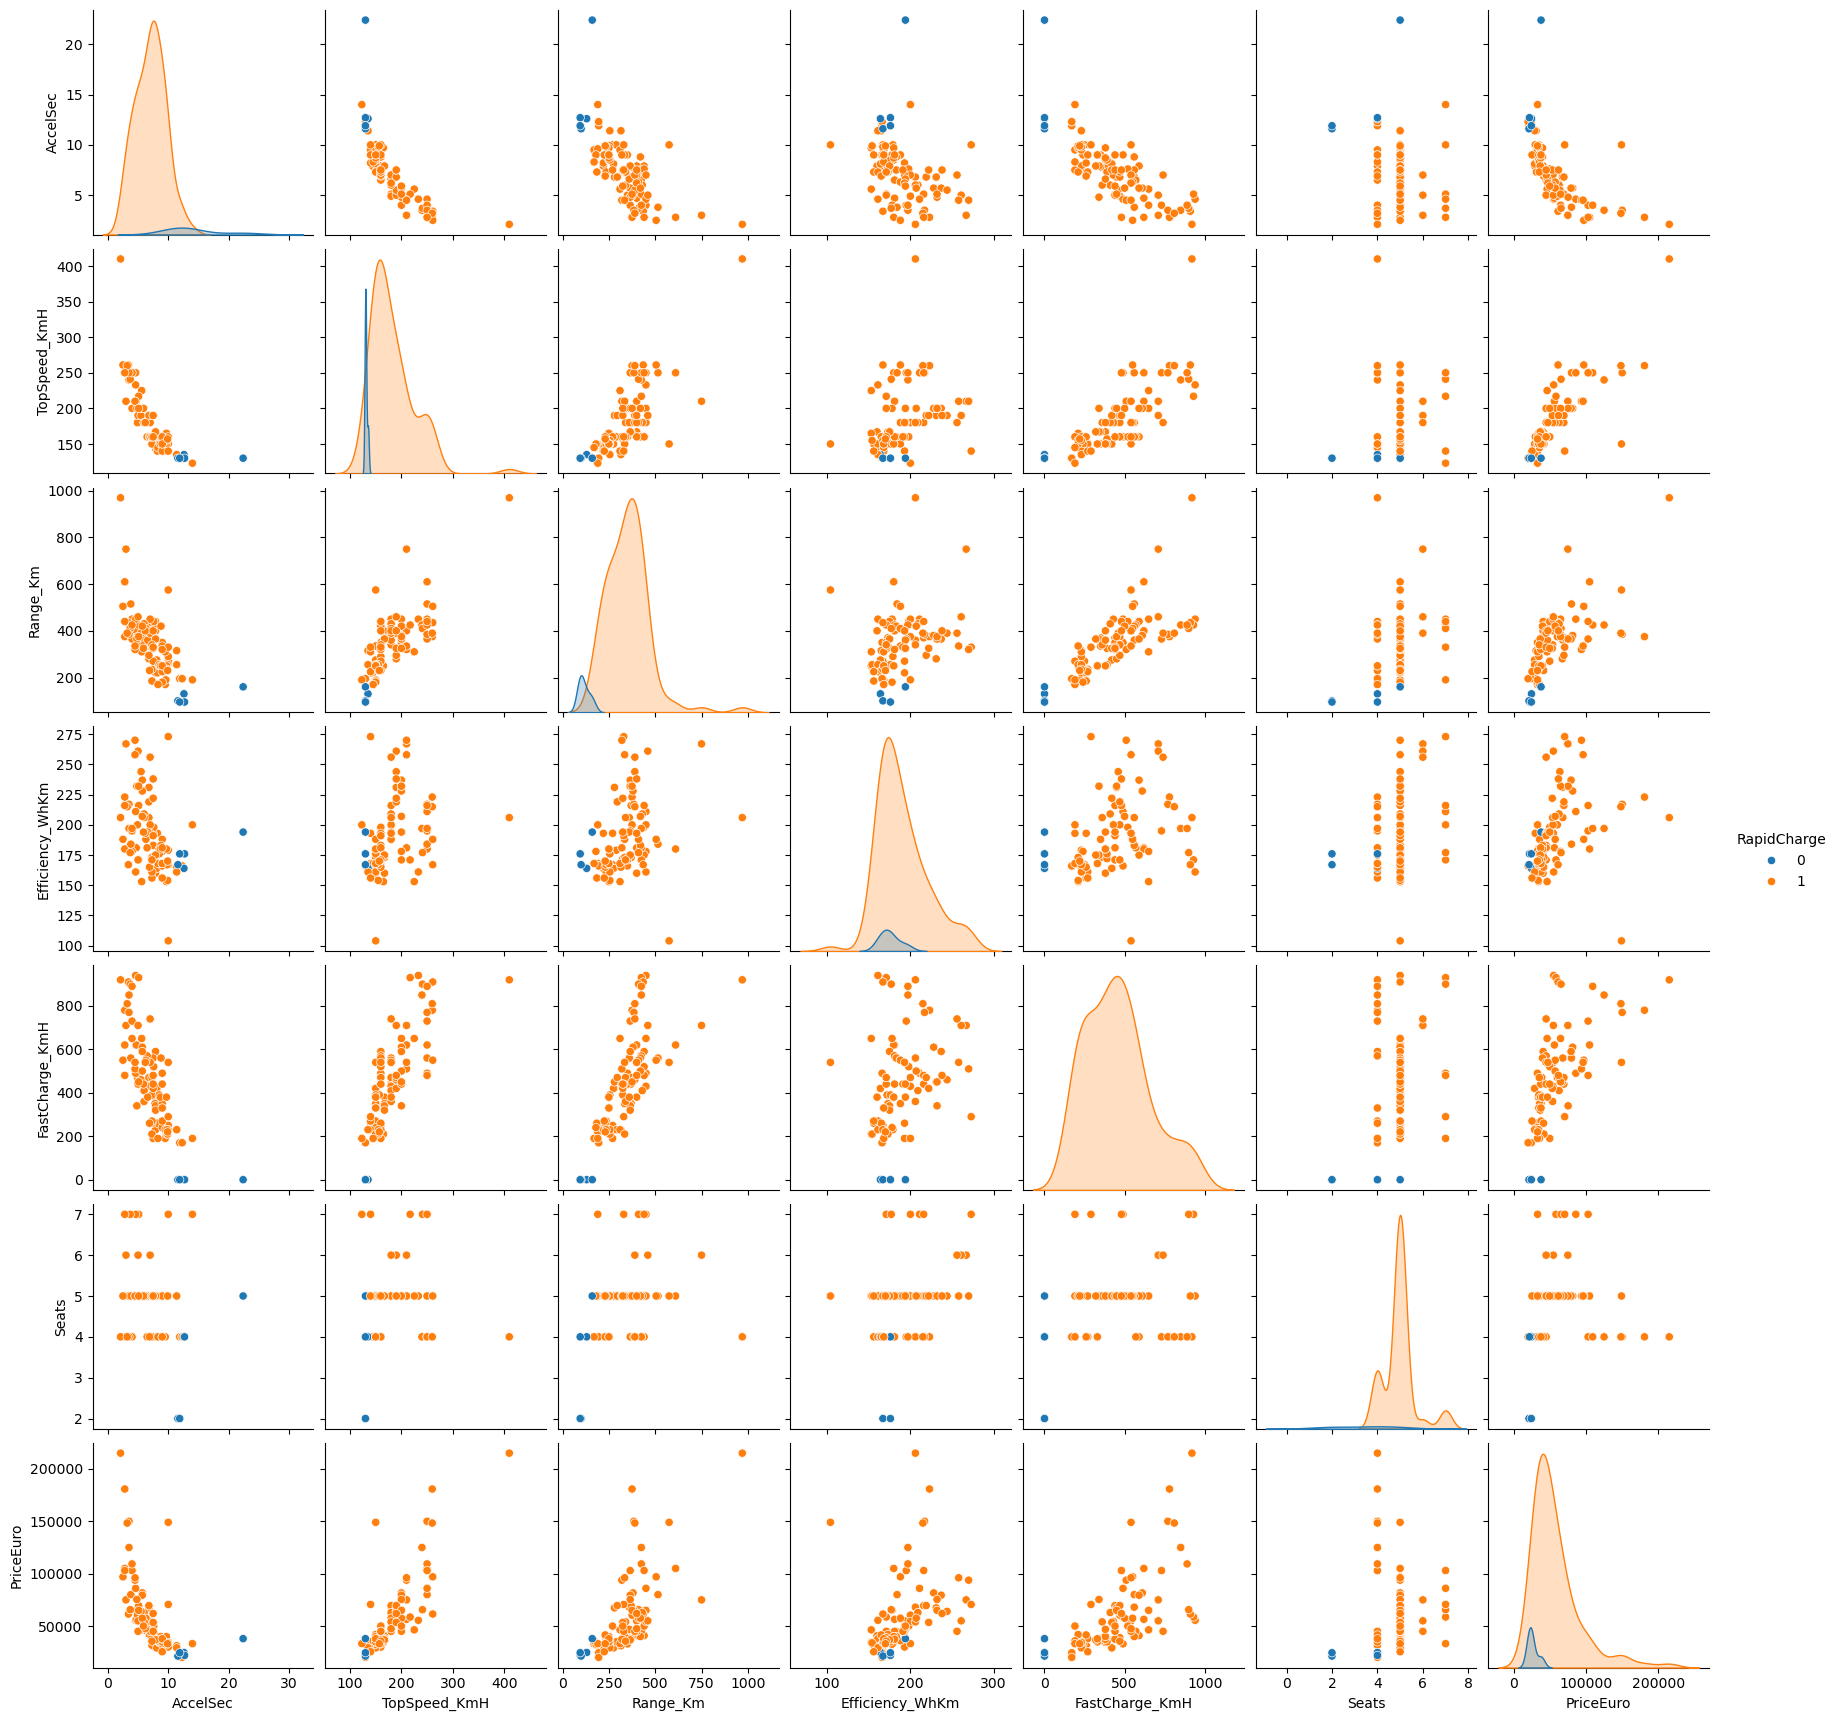

In [48]:
sns.pairplot(df_euro_ev,hue='RapidCharge')
plt.savefig("pairplot")

In [49]:
df_euro_ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 11.4+ KB


In [50]:
df_corr_db = df_euro_ev.select_dtypes(include=['int64','float64'])

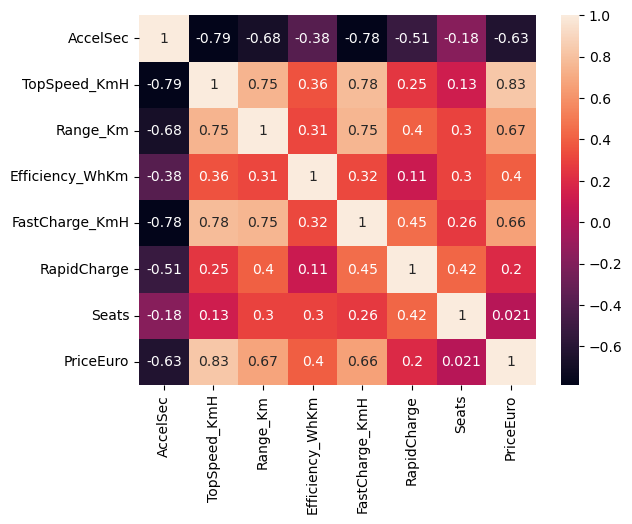

In [51]:
sns.heatmap(df_corr_db.corr(),annot=True)
plt.savefig("heatmap")

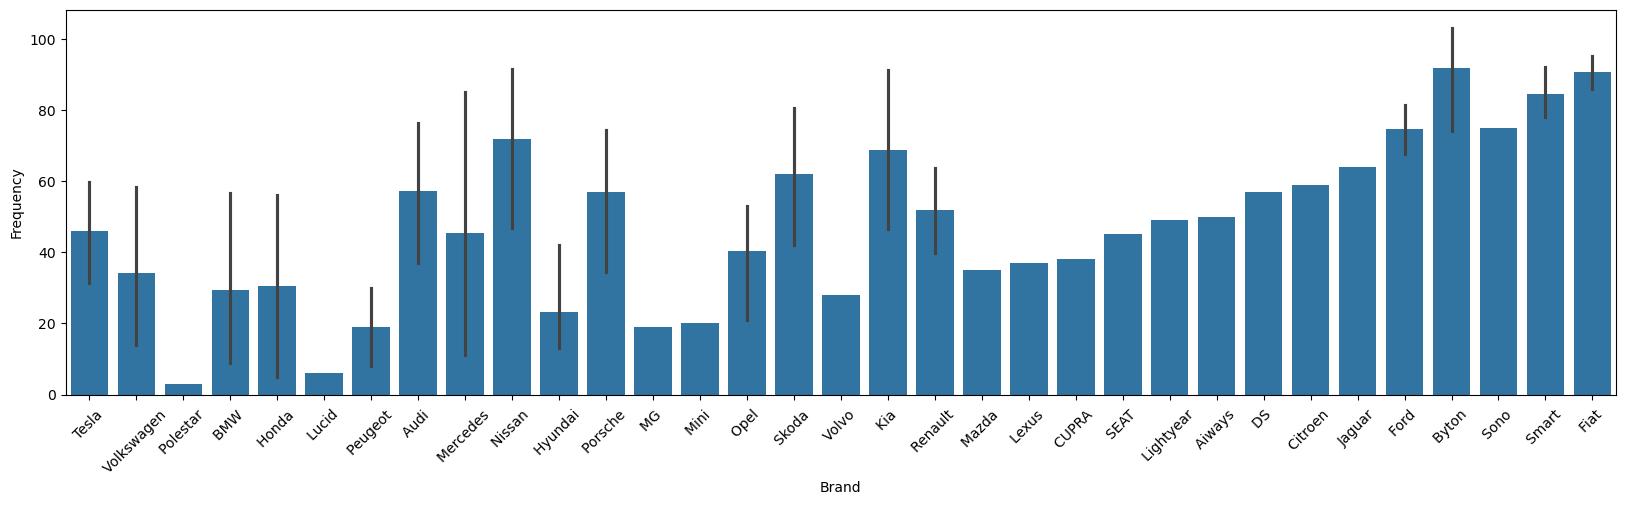

In [81]:
ax = plt.figure(figsize=(20,5))
count = np.arange(1,104)
sns.barplot(x='Brand',y=count,data=df_euro_ev)
plt.ylabel("Frequency")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.savefig("frequency vs Brand")
plt.show()


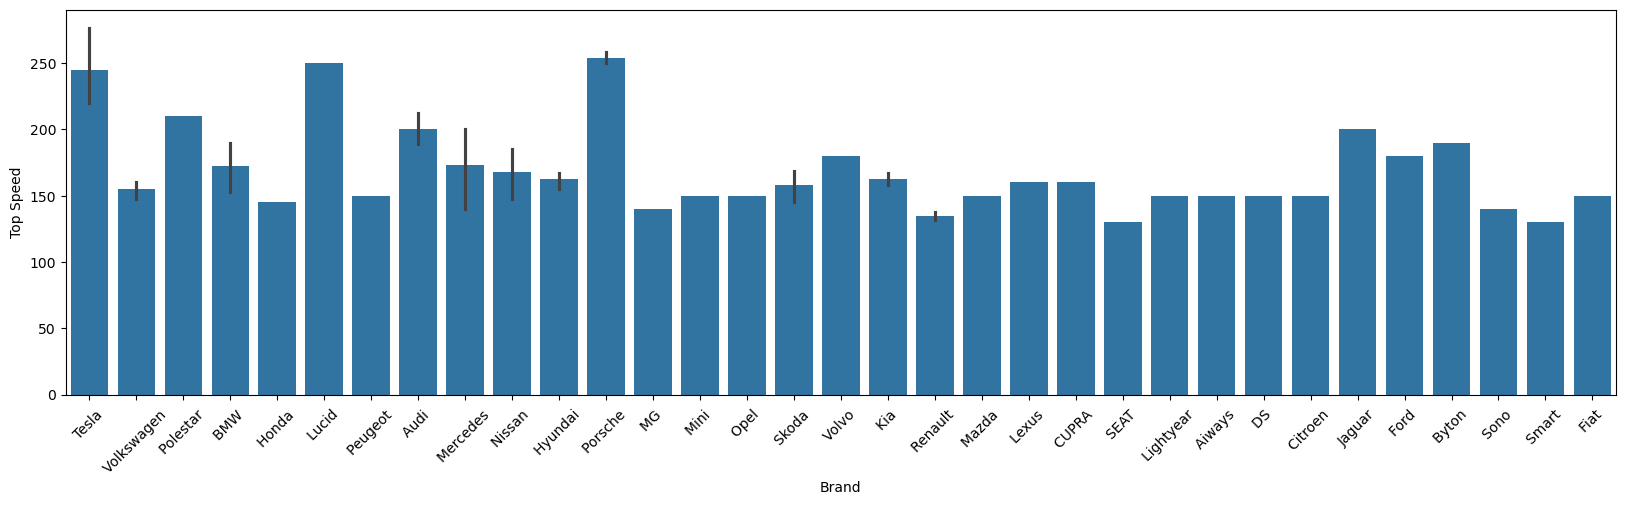

In [82]:
ax = plt.figure(figsize=(20,5))
count = np.arange(1,104)
sns.barplot(x='Brand',y="TopSpeed_KmH",data=df_euro_ev)
plt.ylabel("Top Speed")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.savefig("Brand vs Topspeed")
plt.show()


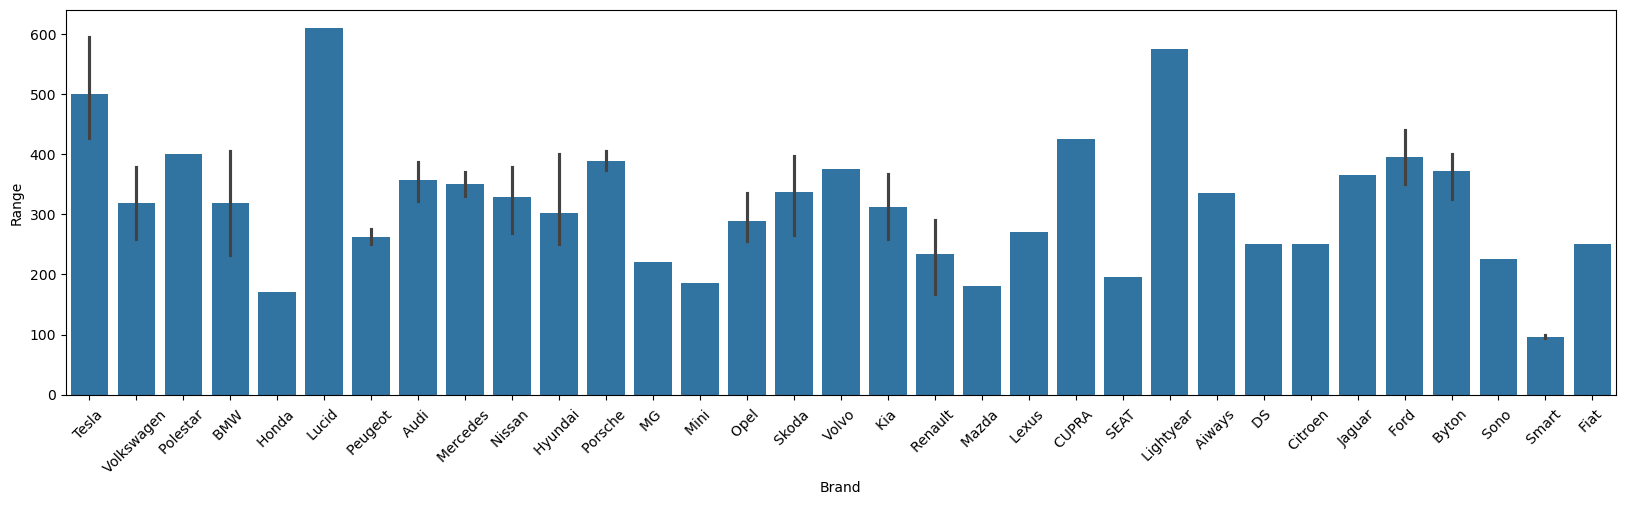

In [83]:
ax = plt.figure(figsize=(20,5))
count = np.arange(1,104)
sns.barplot(x='Brand',y="Range_Km",data=df_euro_ev)
plt.ylabel("Range")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.savefig("brand vs range_km")
plt.show()


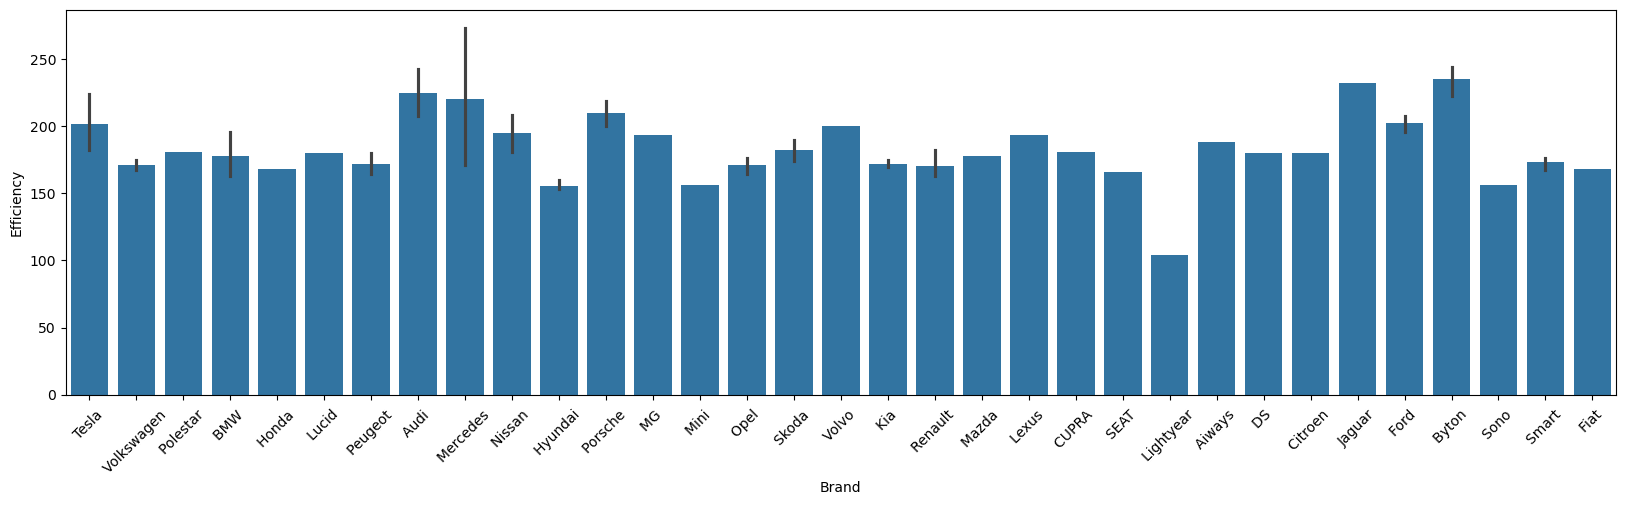

In [84]:
ax = plt.figure(figsize=(20,5))
count = np.arange(1,104)
sns.barplot(x='Brand',y="Efficiency_WhKm",data=df_euro_ev)
plt.ylabel("Efficiency")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.savefig("brand vs efficiency")
plt.show()



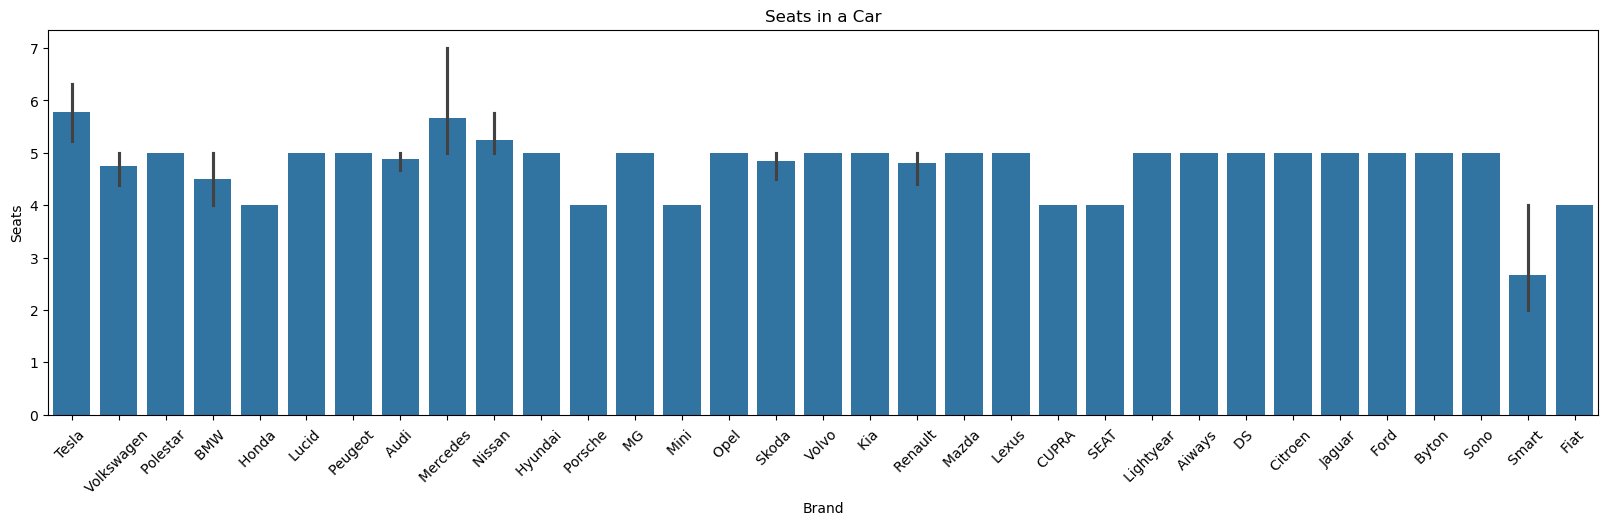

In [85]:
ax = plt.figure(figsize=(20,5))
count = np.arange(1,104)
sns.barplot(x='Brand',y="Seats",data=df_euro_ev)
plt.title("Seats in a Car")
plt.ylabel("Seats")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.savefig("brand vs seats")
plt.show()



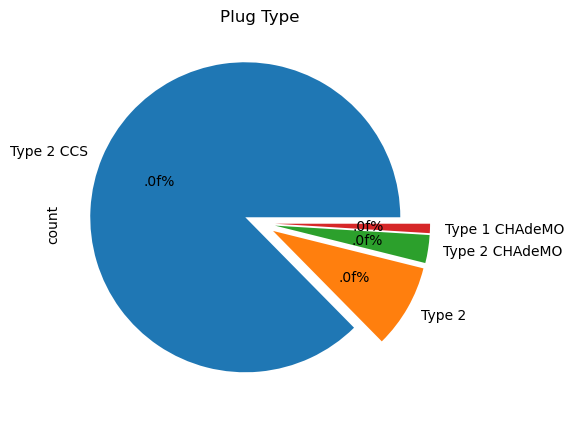

In [86]:
df_euro_ev['PlugType'].value_counts().plot.pie(figsize=(5,10),autopct='.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

plt.savefig("piechart plugtype")

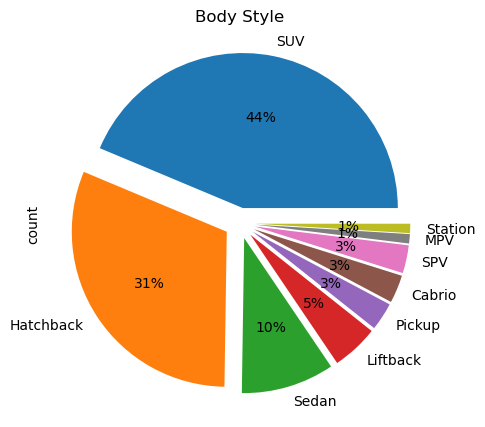

In [87]:
df_euro_ev['BodyStyle'].value_counts().plot.pie(figsize=(5,10),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')
plt.savefig("piechart bodystyle")

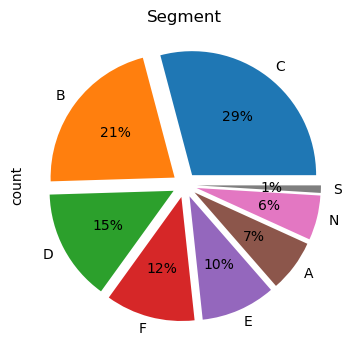

In [88]:
df_euro_ev['Segment'].value_counts().plot.pie(figsize=(4,10),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title("Segment")
plt.savefig("segment piechart")

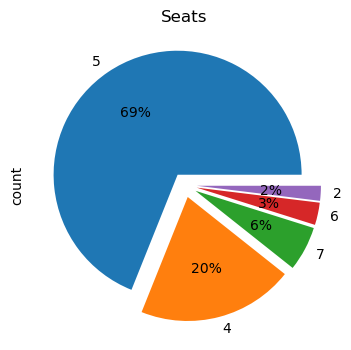

In [89]:
df_euro_ev['Seats'].value_counts().plot.pie(figsize=(4,10),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')
plt.savefig("piechart seats")

In [61]:
X = df_euro_ev[['AccelSec', 'Range_Km', 'TopSpeed_KmH', 'Efficiency_WhKm']]
y = df_euro_ev['PriceEuro']

In [62]:
import statsmodels.api as sm

In [63]:
X = sm.add_constant(X)
results = sm.OLS(y,X)

In [64]:
model = results.fit()

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     60.28
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           1.37e-25
Time:                        09:52:25   Log-Likelihood:                -1156.8
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      98   BIC:                             2337.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.051e+05    2.3e+04     -4.578      0.000   -1.51e+05   -5.96e+04
AccelSec         1482.2127   1033.219      1.435      0.155    -568.178    3532.603
Range_Km           37.7714     22.680      1.665      0.099      -7.236      82.779
TopSpeed_KmH      613.9243     78.224      7.848      0.000     458.691     769.157
Efficiency_WhKm   143.7166     68.228      2.106      0.038       8.320     279.113
==============================================================================
Omnibus:                       94.859   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1049.593
Skew:                           2.978   Prob(JB):                    1.21e-228
Kurtosis:                      17.460   Cond. No.                     5.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Using Linear Regression and Logitisc Regression for Prediction

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=365)

In [68]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [69]:
LR.fit(X_train, y_train)

LinearRegression()

In [70]:
pred = LR.predict(X_test)

In [71]:
from sklearn.metrics import r2_score
r2 = (r2_score(y_test,pred))

In [72]:
print(r2*100)

78.35225979903609


In [73]:
y1 = df_euro_ev[['RapidCharge']]
x1 = df_euro_ev[['PriceEuro']]

In [74]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=365)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
log = LogisticRegression()

In [77]:
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, pred1)
cm

array([[ 0,  1],
       [ 0, 20]], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y1_test,pred1)
score*100

95.23809523809523